In [1]:
print("1876352 통계학과 장혜수")

1876352 통계학과 장혜수


# 네이버 뉴스 기사 분석
## 1. 네이버 뉴스 크롤링

In [2]:
# 필요한 모듈 import
import os
import sys
import urllib.request
import requests
import warnings
warnings.filterwarnings('ignore')

# 네이버 오픈 API 이용자 정보
client_id = "lilqSt8PRioVtVQi2JyA"
client_secret = "ezqTQkSKO1"

In [3]:
news_data = []   # 뉴스 정보들을 저장할 빈 리스트
page_count = 30   # 30페이지까지
encText = urllib.parse.quote("파이썬")   # 검색어

for idx in range(page_count):
    url = "https://openapi.naver.com/v1/search/news?query=" + encText + "&start=" + str(idx * 10 + 1)
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    response = urllib.request.urlopen(request)
    rescode = response.getcode()
    
    if(rescode==200):
        response_body = response.read()
        result = requests.get(response.geturl(),
                             headers={"X-Naver-Client-Id":client_id,
                                      "X-Naver-Client-Secret":client_secret}
                             )
        news_data.append(result.json())
        print(response_body.decode('utf-8'))
    else:
        print("Error Code:" + rescode)

{
"lastBuildDate": "Thu, 06 May 2021 23:53:19 +0900",
"total": 10125,
"start": 1,
"display": 10,
"items": [
{
"title": "대구시, 시민 디지털 역량강화 교육사업 검토",
"originallink": "http://www.ksmnews.co.kr/default/index_view_page.php?idx=334109&part_idx=7",
"link": "http://www.ksmnews.co.kr/default/index_view_page.php?idx=334109&part_idx=7",
"description": "▲심화 과정은 일정 수준의 결과물을 만들어 다른 사람에게 전달할 수 있는 자기주도의 디지털 활용이 가능하도록 코딩, <b>파이썬</b> 시작하기, 내가 만드는 인공지능 과정이 있다. ▲특별 과정은 신기술 체험 위주의... ",
"pubDate": "Thu, 06 May 2021 22:02:00 +0900"

},
{
"title": "대구시, 비대면 시대 디지털 격차 해소'총력'",
"originallink": "http://www.dkilbo.com/news/articleView.html?idxno=332692",
"link": "http://www.dkilbo.com/news/articleView.html?idxno=332692",
"description": "심화 과정은 일정 수준의 결과물을 만들어 다른 사람에게 전달할 수 있는 자기주도의 디지털 활용이 가능하도록 코딩, <b>파이썬</b> 시작하기, 내가 만드는 인공지능 과정이 있으며, 특별 과정은 신기술 체험 위주의 과정으로... ",
"pubDate": "Thu, 06 May 2021 20:32:00 +0900"

},
{
"title": "대구시, 무료 디지털 역량강화 교육사업 시행",
"originallink": "http://www.kbsm.net/default/index_view_page.p

네이버 뉴스에서 "파이썬"을 검색하면 나오는 기사들을 최신순으로 정렬한 제목, 링크, 간단한 내용, 시간들이 나온다.

In [4]:
print(len(news_data))   # 30페이지에 해당되는 정보들

30


In [5]:
print(news_data[0])   # 첫 번째 페이지에 있는 뉴스들

{'lastBuildDate': 'Thu, 06 May 2021 23:53:19 +0900', 'total': 10125, 'start': 1, 'display': 10, 'items': [{'title': '대구시, 시민 디지털 역량강화 교육사업 검토', 'originallink': 'http://www.ksmnews.co.kr/default/index_view_page.php?idx=334109&part_idx=7', 'link': 'http://www.ksmnews.co.kr/default/index_view_page.php?idx=334109&part_idx=7', 'description': '▲심화 과정은 일정 수준의 결과물을 만들어 다른 사람에게 전달할 수 있는 자기주도의 디지털 활용이 가능하도록 코딩, <b>파이썬</b> 시작하기, 내가 만드는 인공지능 과정이 있다.\xa0▲특별 과정은 신기술 체험 위주의... ', 'pubDate': 'Thu, 06 May 2021 22:02:00 +0900'}, {'title': "대구시, 비대면 시대 디지털 격차 해소'총력'", 'originallink': 'http://www.dkilbo.com/news/articleView.html?idxno=332692', 'link': 'http://www.dkilbo.com/news/articleView.html?idxno=332692', 'description': '심화 과정은 일정 수준의 결과물을 만들어 다른 사람에게 전달할 수 있는 자기주도의 디지털 활용이 가능하도록 코딩, <b>파이썬</b> 시작하기, 내가 만드는 인공지능 과정이 있으며, 특별 과정은 신기술 체험 위주의 과정으로... ', 'pubDate': 'Thu, 06 May 2021 20:32:00 +0900'}, {'title': '대구시, 무료 디지털 역량강화 교육사업 시행', 'originallink': 'http://www.kbsm.net/default/index_view_page.php?idx

In [6]:
print(news_data[0]['items'][0]['link'])   # 링크 추출

http://www.ksmnews.co.kr/default/index_view_page.php?idx=334109&part_idx=7


### 네이버 뉴스 기사 링크 추출

In [7]:
# 뉴스들 중 네이버뉴스에 해당하는 링크만 가져오기
naver_news_link = []

for page in news_data:
    page_news_link = []
    for item in page['items']:
        temp_link = item['link']
        if "naver" in temp_link:   # 링크에 naver라는 글자가 있으면
            page_news_link.append(temp_link)
    naver_news_link.append(page_news_link)

In [8]:
# 링크 사이트 확인
for page in naver_news_link:
    for link in page:
        print(link)

https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=015&aid=0004542231
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=011&aid=0003906890
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=015&aid=0004542158
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=008&aid=0004583471
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=008&aid=0004583406
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=030&aid=0002943056
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=009&aid=0004789526
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=105&oid=030&aid=0002942831
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=277&aid=0004896806
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=421&aid=0005329251
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=105&oid=092&aid=0002221034
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&

###  네이버 뉴스 기사 제목+내용 크롤링

In [9]:
# 필요한 모듈 import
import pandas as pd
import numpy as np
from selenium import webdriver
from tqdm import tqdm_notebook
import requests
import pickle
import re
import ast

from bs4 import BeautifulSoup
from urllib.request import urlopen
import urllib
import time

In [10]:
driver = webdriver.Chrome("chromedriver.exe")

In [11]:
naver_news_title = []
naver_news_content = []

for n in tqdm_notebook(range(len(naver_news_link))):
    for idx in tqdm_notebook(range(len(naver_news_link[n]))):
        # url 접속
        try:
            driver.get(naver_news_link[n][idx])
            print(naver_news_link[n][idx])
        except:
            print("Timeout")
            continue
        try:
            response = driver.page_source
        except UnexpectedAlertPresentException:
            driver.switch_to_alert().accept()
            print("게시글이 삭제된 경우입니다.")
            continue
        soup = BeautifulSoup(response, "html.parser")
        
        # 뉴스 제목
        title = None
        try:
            item = soup.find('div', class_ = "article_info")
            title = item.find('h3', class_ = "tts_head").get_text()
        except:
            title = "OUTLINK"
        naver_news_title.append(title)

        # 뉴스 내용
        doc = None
        text = ""
        data = soup.find_all("div", {"class" : "_article_body_contents"})
        if data:
            for item in data:
                text = text + str(item.find_all(text=True)).strip()
                text = ast.literal_eval(text)
                doc = ' '.join(text)
        else:   # 오류가 나면 OUTLINK로
            doc = "OUTLINK"
        naver_news_content.append(doc.replace('\n', ' '))

https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=015&aid=0004542231
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=011&aid=0003906890
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=015&aid=0004542158



https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=008&aid=0004583471
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=008&aid=0004583406
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=030&aid=0002943056
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=009&aid=0004789526



https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=105&oid=030&aid=0002942831
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=277&aid=0004896806



https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=421&aid=0005329251
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=105&oid=092&aid=0002221034
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=030&aid=0002942712



https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=103&oid=092&aid=0002221019



https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=015&aid=0004538885
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=008&aid=0004580443



https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=009&aid=0004786786
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=030&aid=0002942028
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=105&oid=092&aid=0002220610



https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=103&oid=029&aid=0002670280
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=105&oid=031&aid=0000595634
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=030&aid=0002941712



https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=003&aid=0010468899



https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=025&aid=0003096993
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=020&aid=0003353695
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=105&oid=584&aid=0000013971



https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=015&aid=0004536379
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=421&aid=0005312281
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=003&aid=0010466262
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=001&aid=0012353500



https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=437&aid=0000264510



https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=103&oid=081&aid=0003180986
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=076&aid=0003719902
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=103&oid=018&aid=0004908523



https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=103&oid=119&aid=0002486822
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=103&oid=016&aid=0001825017
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=103&oid=014&aid=0004625362
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=648&aid=0000000545
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=105&oid=092&aid=0002219819
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=106&oid=215&aid=0000952435



https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=105&oid=138&aid=0002101972
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=105&oid=029&aid=0002668708
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=105&oid=018&aid=0004907641



https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=105&oid=008&aid=0004574314



https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=014&aid=0004621060
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=016&aid=0001821737
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=277&aid=0004885127



https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=103&oid=215&aid=0000951024
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=030&aid=0002939113
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=015&aid=0004530126
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=029&aid=0002667198



https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=030&aid=0002938918
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=105&oid=030&aid=0002938723



https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=008&aid=0004571401
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=105&oid=092&aid=0002218734



https://sports.news.naver.com/news.nhn?oid=311&aid=0001284537
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=417&aid=0000678675
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=105&oid=009&aid=0004774849



https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=105&oid=008&aid=0004568117
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=030&aid=0002937256



https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=277&aid=0004878751
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=105&oid=009&aid=0004773889
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=105&oid=011&aid=0003891657
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=015&aid=0004523218
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=105&oid=023&aid=0003605347



https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=015&aid=0004522761



https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=023&aid=0003605098
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=011&aid=0003890120



https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=008&aid=0004565028
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=009&aid=0004771315
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=103&oid=016&aid=0001814021
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=105&oid=030&aid=0002935999
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=105&oid=092&aid=0002217445



https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=417&aid=0000674602
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=050&aid=0000056963
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=055&aid=0000883529
https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=215&aid=0000946703




In [12]:
len(naver_news_title)   # 30페이지의 기사들 중 네이버뉴스는 76개

76

In [13]:
print(naver_news_title[:5])   # 앞 5개의 제목 확인

['외부 수혈 안되니 키워서 쓴다는 은행들', 'SNS·유튜브·코딩 무료로 가르쳐 준다···대구시 ‘디지털 역량강화 무료교육’ 진행', '파이썬 가르치는 4대 은행들…1년 만에 석사급 150명 양성', '지니로봇, 중기부 K-스타트업센터 해외진출 지원사업 선정', "지니로봇, 과기부 'DNA 융합 제품·서비스 해외진출 지원사업' 선정"]


In [14]:
print(naver_news_content[:5])   # 앞 5개의 내용 확인

['   본문 내용     TV플레이어     // TV플레이어     // flash 오류를 우회하기 위한 함수 추가 function _flash_removeCallback() {}    4대 시중은행 내부교육 주력 디지털금융·데이터분석 석사 등 1년간 전문인력  158 명 육성 신한·국민·우리·하나 등 4대 시중은행에서 디지털 금융·인공지능( AI )·빅데이터 분석 등 정보기술( IT ) 전문가 과정을 수료한 내부 직원이 총  150 여 명에 달한 것으로 나타났다. 우수 개발 인력이 빅테크로 몰리는 등 채용이 어려워지자 내부 직원을 전문가로 직접 양성하는 쪽으로 방향을 전환하고 있다는 분석이다. 28 일 금융업계에 따르면 4대 은행이 각종 연수 과정을 통해 양성한 디지털 전문 인력은 총  158 명으로 집계됐다. 이들 은행은  2018 년 국민은행을 시작으로 신한·하나(지난해), 우리은행(올해)에 이르기까지 디지털 관련 연수 과정을 속속 도입했다. 은행들은 기초지식 함양(레벨1), 코딩 실무(레벨2),  AI  또는 경영전문대학원(레벨3) 등 단계별 교육 시스템도 갖췄다. 국민은행은 올해부터 수업 때마다 과제 제출 또는 시험에 통과해야만 수료할 수 있도록 교육 강도를 크게 높였지만 디지털 금융과 데이터 분석 영역에서만 각각  1800 명,  532 명이 지원할 정도로 반응이 뜨거웠던 것으로 알려졌다. 하지만 지난 2년간 최종 레벨까지 통과한 직원은 각각  12 명,  16 명에 불과한 것으로 전해졌다. 국민은행 관계자는 “올해 해외 온라인 석사학위 과정인 코세라 등 신규 프로그램도 곧 선보일 예정”이라고 말했다. 신한은행도 자체 디지털 교육과정에 참여한 인원만 1만 3000 명에 달하지만 최종 관문인 ‘디지털 스페셜리스트’(석사)까지 도달한 직원은  53 명으로 전체의  0.4 %에 그쳤다. 신한금융도 전 계열사 직원 가운데  30~34 명을 매년 고려대 금융공학 및  AI  석사 과정에 위탁 교육을 보내고 있다. 올해부터 자격증 취득을 중심으로 하는 ‘디

In [15]:
# dataframe으로 만들어주기
data = {
    '제목':naver_news_title,
    '내용':naver_news_content
    }
news = pd.DataFrame(data)
print(news.head())

                                               제목  \
0                           외부 수혈 안되니 키워서 쓴다는 은행들   
1  SNS·유튜브·코딩 무료로 가르쳐 준다···대구시 ‘디지털 역량강화 무료교육’ 진행   
2               파이썬 가르치는 4대 은행들…1년 만에 석사급 150명 양성   
3                 지니로봇, 중기부 K-스타트업센터 해외진출 지원사업 선정   
4          지니로봇, 과기부 'DNA 융합 제품·서비스 해외진출 지원사업' 선정   

                                                  내용  
0     본문 내용     TV플레이어     // TV플레이어     // flash...  
1     본문 내용     TV플레이어     // TV플레이어     // flash...  
2     본문 내용     TV플레이어     // TV플레이어     // flash...  
3     본문 내용     TV플레이어     // TV플레이어     // flash...  
4     본문 내용     TV플레이어     // TV플레이어     // flash...  


## 2. 데이터 분석
### 뉴스 제목 wordcloud 그리기

In [16]:
# 필요한 모듈 import
from collections import Counter
from wordcloud import WordCloud
from wordcloud  import ImageColorGenerator
import matplotlib.pyplot as plt
from konlpy.tag import Kkma
kkma = Kkma()

In [17]:
# 형태소 분석
sentences_tag = []

for sentence in naver_news_title:
    word_tag = kkma.pos(sentence)
    sentences_tag.append(word_tag)

In [18]:
# 형태소 분석 후 명사만 추출
noun_list = []

for sentence in sentences_tag:
    for word, tag in sentence:
        if tag in ['NNG']:
            noun_list.append(word)
            
print(noun_list)

['외부', '수혈', '안', '은행', '유', '튜브', '코딩', '무료', '대구시', '디지털', '역량', '강화', '무료', '교육', '진행', '파이', '은행', '석사', '급', '양성', '로봇', '중기', '스타트', '업', '센터', '해외', '진출', '지원', '사업', '선정', '로봇', '과', '기부', '융합', '제품', '서비스', '해외', '진출', '지원', '사업', '선정', '대구시', '올해', '말', '시민', '대상', '무료', '디지털', '역량', '강화', '교육', '진행', '상품', '투자', '코딩', '접목', '대학', '동아리', '로봇', '과', '기부', '융합', '제품', '서비스', '해외', '진출', '지원', '사업', '선정', '벌', '합작', '법인', '발판', '서울대', '캠퍼스', '타운', '로봇', '자율', '주행', '프로그램', '참여', '학생', '건국', '대', '산업', '대학원', '신설', '미래', '자동차', '학과', '신입생', '파이', '소프트웨어', '재단', '후원', '최고', '등급', '상향', '신', '상품', '대상', '수상작', '심사', '건국', '대', '산업', '대학원', '미래', '자동차', '학과', '신설', '신입생', '어린이날', '프리미엄', '선물', '핑퐁', '로봇', '토이', '진행', '넷', '빅', '데이터', '기반', '디지털', '인재', '양성', '디지털', '교육생', '넷', '빅', '데이터', '기반', '디지털', '핵심', '실무', '인재', '양성', '넷', '디지털', '핵심', '실무', '인재', '양성', '과정', '교육생', '모집', '빅', '데이터', '전문가', '넷', '빅', '데이터', '수강생', '모집', '국민', '내일', '카드', '무료', '아카데미', '컨설팅', '구직자', '디지털', '기초

In [19]:
# 명사 중에서 두음절 단어만 추출 

print('▶ 전체 명사의 수 = ', len(noun_list))
print() 

noun_list = [word for word in noun_list if len(word) > 1]    # 명사중에서 두 음절 이상의 단어 추출

print('▶ 두 음절 이상의 명사의 수 = ', len(noun_list))
print()

print(noun_list[:100])   # 처음부터 나오는 순서대로 100개 단어 출력

▶ 전체 명사의 수 =  610

▶ 두 음절 이상의 명사의 수 =  531

['외부', '수혈', '은행', '튜브', '코딩', '무료', '대구시', '디지털', '역량', '강화', '무료', '교육', '진행', '파이', '은행', '석사', '양성', '로봇', '중기', '스타트', '센터', '해외', '진출', '지원', '사업', '선정', '로봇', '기부', '융합', '제품', '서비스', '해외', '진출', '지원', '사업', '선정', '대구시', '올해', '시민', '대상', '무료', '디지털', '역량', '강화', '교육', '진행', '상품', '투자', '코딩', '접목', '대학', '동아리', '로봇', '기부', '융합', '제품', '서비스', '해외', '진출', '지원', '사업', '선정', '합작', '법인', '발판', '서울대', '캠퍼스', '타운', '로봇', '자율', '주행', '프로그램', '참여', '학생', '건국', '산업', '대학원', '신설', '미래', '자동차', '학과', '신입생', '파이', '소프트웨어', '재단', '후원', '최고', '등급', '상향', '상품', '대상', '수상작', '심사', '건국', '산업', '대학원', '미래', '자동차', '학과', '신설']


In [20]:
# 단어의 출현 횟수 카운트
counts = Counter(noun_list)

words = counts.most_common(50)     # 가장 많이 출현한 횟수 순으로 50개 단어만 추출 한 후 word clouding  

print(words)

[('교육', 21), ('로봇', 9), ('인재', 9), ('코딩', 8), ('디지털', 8), ('양성', 8), ('데이터', 8), ('무료', 7), ('파이', 6), ('지원', 6), ('선정', 6), ('미래', 6), ('실무', 6), ('과정', 6), ('콘텐츠', 6), ('기업', 6), ('사업', 5), ('교육생', 5), ('아카데미', 5), ('메타', 5), ('활용', 5), ('분기', 5), ('부동산', 5), ('비트', 5), ('인기', 5), ('이브', 5), ('개발자', 5), ('학원', 5), ('진행', 4), ('대학', 4), ('고교', 4), ('검색어', 4), ('독서', 4), ('인공지능', 4), ('역량', 3), ('해외', 3), ('진출', 3), ('모집', 3), ('온라인', 3), ('블록', 3), ('체인', 3), ('전문', 3), ('강의', 3), ('서재', 3), ('관심', 3), ('탑재', 3), ('컴퓨터', 3), ('취업', 3), ('엠에스', 3), ('버스', 3)]


{'교육': 21, '로봇': 9, '인재': 9, '코딩': 8, '디지털': 8, '양성': 8, '데이터': 8, '무료': 7, '파이': 6, '지원': 6, '선정': 6, '미래': 6, '실무': 6, '과정': 6, '콘텐츠': 6, '기업': 6, '사업': 5, '교육생': 5, '아카데미': 5, '메타': 5, '활용': 5, '분기': 5, '부동산': 5, '비트': 5, '인기': 5, '이브': 5, '개발자': 5, '학원': 5, '진행': 4, '대학': 4, '고교': 4, '검색어': 4, '독서': 4, '인공지능': 4, '역량': 3, '해외': 3, '진출': 3, '모집': 3, '온라인': 3, '블록': 3, '체인': 3, '전문': 3, '강의': 3, '서재': 3, '관심': 3, '탑재': 3, '컴퓨터': 3, '취업': 3, '엠에스': 3, '버스': 3}


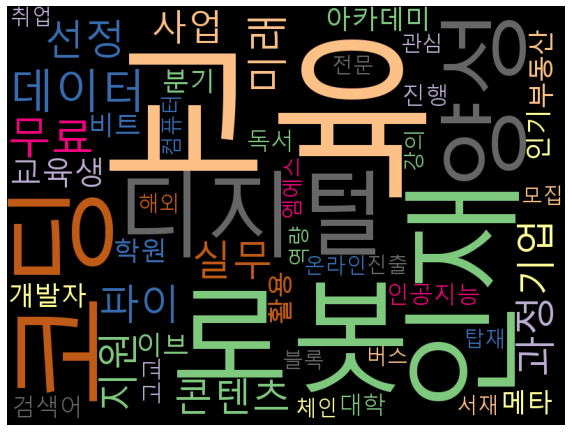

In [21]:
# 단어 출현 횟수에 근거하여 word cloud 생성
wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
                      colormap = 'Accent_r',
                      width=800,
                      height=600)

print(dict(words))

cloud = wordcloud.generate_from_frequencies(dict(words))

plt.figure(figsize=(10, 8))

plt.axis('off')   

plt.imshow(cloud)

plt.show()

요즘 정규 교육과정에 코딩이 있다던데.. 인공지능 로봇 등 코딩 교육으로 미래를 선도할 인재를 양성하는 것이 가장 큰 이슈인 듯하다.

### 비음수행렬을 이용한 뉴스 데이터 토픽 모델링

In [22]:
# 필요한 모듈 import
import time
import datetime
from konlpy.tag import Okt
okt = Okt()

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.decomposition import NMF    # nmf 함수를 가져오기 

In [23]:
def tokenizer(text):
    nouns = okt.nouns(text)
    return [noun for noun in nouns if len(noun) > 1]

In [24]:
# TfidfVectorizer : TFidf를 이용하여 문서-단어 행렬을 생성

vectorizer = TfidfVectorizer(tokenizer=tokenizer, 
                             max_df=0.90,    # 문서빈도 상한선 (90% 가 넘는 문서에 출현하는 단어는 미고려. 조사일 확률 높음)
                             min_df=2,       # 문서빈도 하한선 (2개 이상의 문서에 출현해야 그 단어를 고려함)
                             max_features=1000)     # 전체 문서에서 출현 빈도가 높은 1000개 단어만을 고려 

In [25]:
# 뉴스의 내용을 위의 기준으로 하나의 tf-idf  instance 를 만듬 

start = time.time()    # 시작 시간 기록 

tfidf = vectorizer.fit_transform(naver_news_content)   # 뉴스 내용의 문서-단어 행렬을 만듬 

processing_time = time.time() - start    # 경과 시간 계산  
times = str(datetime.timedelta(seconds = processing_time))  
print('▶ 수행 시간 = ', times)

▶ 수행 시간 =  0:00:04.901896


In [26]:
# 개체의 내용을 확인
tfidf   # 1000개의 단어

<76x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 8407 stored elements in Compressed Sparse Row format>

In [27]:
# get_feature_names : 추출된 단어가 무슨 단어인지 확인
print(vectorizer.get_feature_names()[:50])   # 50개만

['가격', '가계', '가공', '가능성', '가운데', '가장', '가지', '가치', '각각', '각자', '각종', '감각', '감염증', '강남', '강사', '강상', '강세', '강의', '강좌', '강화', '개념', '개론', '개발', '개발자', '개선', '개설', '개월', '개인', '개최', '거나', '거듭', '건국대', '검색', '검색어', '검증', '검토', '게임', '게티', '격차', '결과', '결정', '경력', '경영', '경우', '경쟁', '경쟁력', '경제', '경험', '계산', '계속']


In [28]:
# NMF 적용하기
# 문서 토픽 갯수(그룹 갯수)를 6개로 지정해 줌 (그룹 갯수는 임의로 지정 가능)

nmf = NMF(n_components=6, random_state=1)

H = nmf.fit_transform(tfidf)    # 문서-토픽 행렬을 만듦

W = nmf.components_             # components_ : 토픽-단어 행렬을 만듦

In [29]:
# 각 문서가 6개 토픽 그룹으로 나누어 짐 
# 토픽이 구체적으로 어느 토픽(주제)인지는 아직은 확인 할 수 없음

H.shape

(76, 6)

In [30]:
H.round(2)   # 숫자가 클수록 주제에 가까움

array([[0.28, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.28, 0.  , 0.01, 0.  , 0.01, 0.  ],
       [0.3 , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.69, 0.  , 0.02],
       [0.  , 0.  , 0.  , 0.7 , 0.  , 0.  ],
       [0.28, 0.  , 0.01, 0.  , 0.  , 0.  ],
       [0.05, 0.08, 0.  , 0.08, 0.07, 0.03],
       [0.  , 0.  , 0.  , 0.68, 0.  , 0.  ],
       [0.05, 0.  , 0.  , 0.18, 0.23, 0.06],
       [0.02, 0.01, 0.  , 0.  , 0.19, 0.01],
       [0.02, 0.02, 0.  , 0.03, 0.05, 0.03],
       [0.06, 0.  , 0.02, 0.08, 0.01, 0.2 ],
       [0.02, 0.  , 0.  , 0.  , 0.16, 0.01],
       [0.02, 0.01, 0.05, 0.32, 0.05, 0.01],
       [0.42, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.44, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.44, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.43, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.27, 0.01, 0.02, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.02, 0.32],
       [0.  , 0.  , 0.  , 0.  , 0.01, 0.31],
       [0.04, 0.  , 0.  , 0.  , 0.25, 0.03],
       [0.

In [31]:
# 첫번째 문서는 어느 토픽과 관련이 가장 많은지 확인해 봄 
# 가장 큰 숫자의 토픽에 이 뉴스는 가장 관련이 많음

H[0].round(2)   # index 0 (1번째) 주제에 가장 관련

array([0.28, 0.  , 0.  , 0.  , 0.  , 0.  ])

In [32]:
# 6개 토픽과 각 토픽과 관련된 단어의 연관 관계를 나타냄

W.shape

(6, 1000)

In [33]:
W.round(2)

array([[0.  , 0.  , 0.01, ..., 0.34, 0.  , 0.02],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.01, 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.02],
       [0.03, 0.11, 0.  , ..., 0.  , 0.  , 0.01],
       [0.01, 0.  , 0.  , ..., 0.  , 0.1 , 0.  ]])

주제가 0 인 문서의 갯수 = 28
주제가 1 인 문서의 갯수 = 7
주제가 2 인 문서의 갯수 = 6
주제가 3 인 문서의 갯수 = 8
주제가 4 인 문서의 갯수 = 16
주제가 5 인 문서의 갯수 = 11


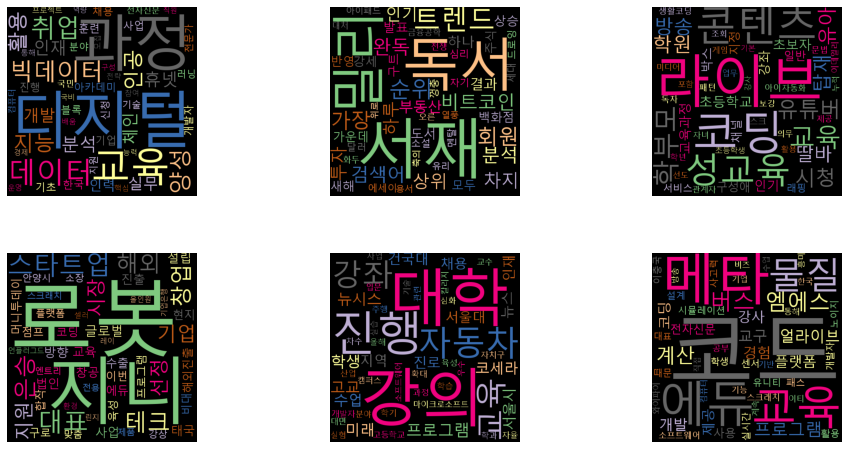

In [34]:
wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
                      colormap = 'Accent_r',
                      width=500,
                      height=500,
                      max_words=50,
                      random_state=1)


# 뉴스마다 토픽을 부여
# H 의 크기는 (76, 6) 행렬 - 각 행에서 가장 큰 값이 존재 => 주제
# 'topic' 이라는 열을 만들고 가장 큰 값을 저장 

news['토픽'] = H.argmax(axis=1)     # axis=1 : 하나의 행 내에서 가장 큰 값의 인덱스를 반환, (axis가 0 이면 열)

plt.figure(figsize=(16, 8))

for idx in range(6):    
    # 토픽이 idx인 문서의 인덱스를 추출  : (예) 5번째 문서의 토픽이 idx 이면 문서의 인덱스인 5를 추출
    # 문서별 주제를 구분하기 위함 
    topic_idx = news.index[news['토픽'] == idx]
    
    print('주제가 {0} 인 문서의 갯수 = {1}' .format(idx, len(topic_idx))) 
    
    # 토픽이 idx인 문서에서  tfidf 값 합계를 단어의 점수로 계산 : tfidf (문서 - 단어 행렬) - 행이 문서, 열이 단어 
    word_score = tfidf.toarray()[topic_idx].sum(axis=0)  # axis=0 : 열의 위 아래값을 더한다.
    
    # {단어: 점수} 형태의 사전을 만듦
    d = dict(zip(vectorizer.get_feature_names(), word_score))
    
    # 워드클라우드를 생성 
    wordcloud.generate_from_frequencies(d)
    
    plt.subplot(2,3,idx+1)
    plt.imshow(wordcloud)
    plt.axis("off")

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

주제에 대해 대략적으로 이름을 붙여본다면,


0번 주제: 디지털 교육 과정 <br>
1번 주제: 밀리의 서재를 이용한 독서<br>
2번 주제: 유튜브 라이브 콘텐츠를 이용한 코딩<br>
3번 주제: 지니와 같은 인공지능 로봇<br>
4번 주제: 대학 강의로 진행되는 교육<br>
5번 주제: 코드 교육<br>

정도가 되겠다. 근데 여기서 교육관련 주제로 0번, 4번, 5번은 유사성을 보이는 것 같기에 문서 토픽(그룹) 개수를 4개로 지정하여 다시 워드클라우드를 그려보았다.

주제가 0 인 문서의 갯수 = 44
주제가 1 인 문서의 갯수 = 6
주제가 2 인 문서의 갯수 = 6
주제가 3 인 문서의 갯수 = 20


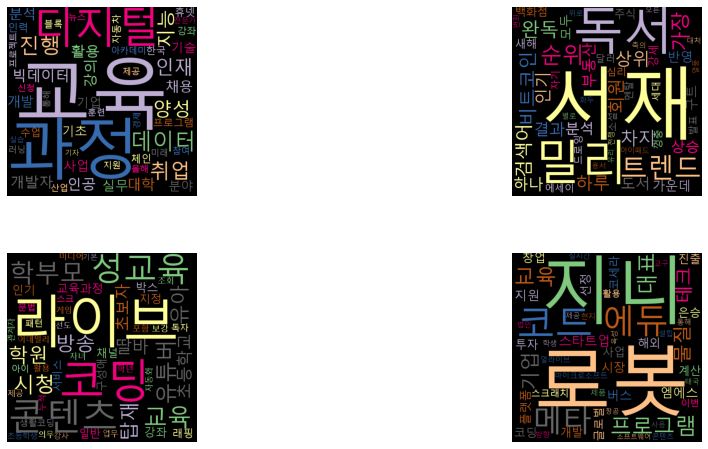

In [35]:
nmf = NMF(n_components=4, random_state=1)
H = nmf.fit_transform(tfidf)
W = nmf.components_

wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
                      colormap = 'Accent_r',
                      width=500,
                      height=500,
                      max_words=50,
                      random_state=1)

news['토픽'] = H.argmax(axis=1)
plt.figure(figsize=(16, 8))

for idx in range(4):    
    topic_idx = news.index[news['토픽'] == idx]
    print('주제가 {0} 인 문서의 갯수 = {1}' .format(idx, len(topic_idx))) 

    word_score = tfidf.toarray()[topic_idx].sum(axis=0)
    
    d = dict(zip(vectorizer.get_feature_names(), word_score))
    
    wordcloud.generate_from_frequencies(d)
    
    plt.subplot(2,2,idx+1)
    plt.imshow(wordcloud)
    plt.axis("off")

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

교육관련 단어들이 다른 주제로 포함되어 워드클라우드가 다시 그려진 것을 확인할 수 있다.